<a href="https://colab.research.google.com/github/NDR-2004/IA/blob/main/Analyse_test_debris_spatiaux.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Titre : Analyse des débris spatiaux en orbite terrestre
Objectif :
Télécharger un jeu de données sur les objets spatiaux en orbite (satellites, débris) et analyser leur répartition selon différents critères (type, altitude, pays, date de lancement...).

In [22]:
# importation bibli
import pandas
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
# creation dataframe
df = pandas.read_csv("fengyun_debris.csv")

In [9]:
# afficher dataframe df
df.head()
#df.columns
#df.describe()

,name,x_km,y_km,z_km,vx_kms,vy_kms,vz_kms,inclination_deg,mean_motion
0,FENGYUN 1C,-4161.170643,-1597.561897,-5637.699720,-5.942018,-0.291184,4.475836,1.726167,0.062169
1,FENGYUN 1C DEB,5285.183144,2802.642158,-5184.756133,-3.458275,-3.507416,-4.936403,1.731890,0.056546
2,FENGYUN 1C DEB,-569.592337,8036.183792,-1105.236082,1.033440,0.858855,6.659316,1.730778,0.056307
3,FENGYUN 1C DEB,-507.916150,-6568.351252,4969.060802,-1.663303,-3.714018,-5.344559,1.734658,0.055598
4,FENGYUN 1C DEB,1491.579439,891.051420,-7112.239597,7.219700,-1.795905,1.564151,1.735262,0.054853


In [12]:
# Soustraire le rayon moyen de la Terre (~6371 km) pour avoir l’altitude au-dessus de la surface
df["altitude_débris_km"] = (np.sqrt(df["x_km"]**2 + df["y_km"]**2 + df["z_km"]**2)-6371)
df.head()

,name,x_km,y_km,z_km,vx_kms,vy_kms,vz_kms,inclination_deg,mean_motion,altitude_débris_km
0,FENGYUN 1C,-4161.170643,-1597.561897,-5637.699720,-5.942018,-0.291184,4.475836,1.726167,0.062169,815.877157
1,FENGYUN 1C DEB,5285.183144,2802.642158,-5184.756133,-3.458275,-3.507416,-4.936403,1.731890,0.056546,1545.417125
2,FENGYUN 1C DEB,-569.592337,8036.183792,-1105.236082,1.033440,0.858855,6.659316,1.730778,0.056307,1760.803746
3,FENGYUN 1C DEB,-507.916150,-6568.351252,4969.060802,-1.663303,-3.714018,-5.344559,1.734658,0.055598,1880.835083
4,FENGYUN 1C DEB,1491.579439,891.051420,-7112.239597,7.219700,-1.795905,1.564151,1.735262,0.054853,950.388799


In [14]:
df["vitesse kms"] = np.sqrt(df["vx_kms"]**2 + df["vy_kms"]**2 + df["vz_kms"]**2)
df.head()

,name,x_km,y_km,z_km,vx_kms,vy_kms,vz_kms,inclination_deg,mean_motion,altitude_débris_km,vitesse,vitesse kms
0,FENGYUN 1C,-4161.170643,-1597.561897,-5637.699720,-5.942018,-0.291184,4.475836,1.726167,0.062169,815.877157,7.444828,7.444828
1,FENGYUN 1C DEB,5285.183144,2802.642158,-5184.756133,-3.458275,-3.507416,-4.936403,1.731890,0.056546,1545.417125,6.973500,6.973500
2,FENGYUN 1C DEB,-569.592337,8036.183792,-1105.236082,1.033440,0.858855,6.659316,1.730778,0.056307,1760.803746,6.793535,6.793535
3,FENGYUN 1C DEB,-507.916150,-6568.351252,4969.060802,-1.663303,-3.714018,-5.344559,1.734658,0.055598,1880.835083,6.717501,6.717501
4,FENGYUN 1C DEB,1491.579439,891.051420,-7112.239597,7.219700,-1.795905,1.564151,1.735262,0.054853,950.388799,7.602362,7.602362


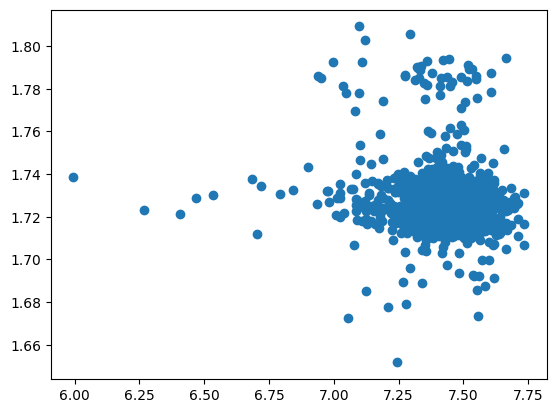

In [17]:
plt.scatter(df["vitesse kms"], df['inclination_deg'])
plt.show()

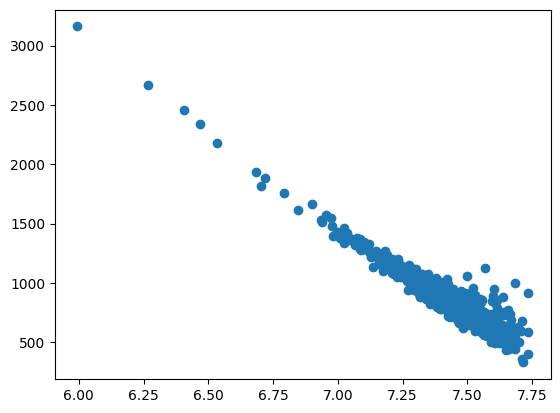

In [18]:
# nuage de point altitude par rapport à la vitesse
plt.scatter(df["vitesse kms"], df['altitude_débris_km'])
plt.show()

<ipython-input-21-4761e8f6aacb>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("classe_inclinaison")["vitesse kms"].mean().plot(kind="bar")


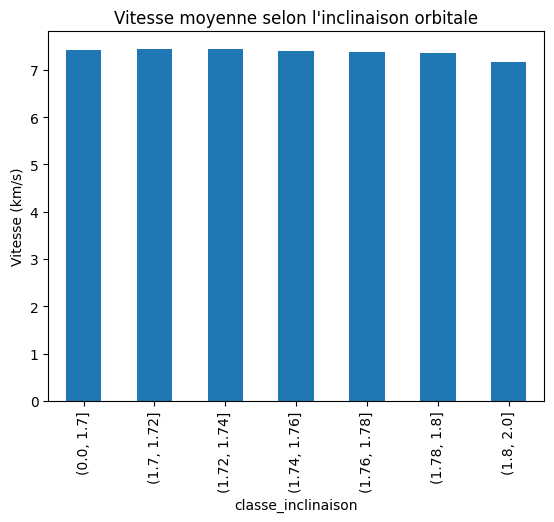

In [21]:
# Histogramme ou moyenne des vitesses par classe d'inclinaison
df["classe_inclinaison"] = pandas.cut(df["inclination_deg"], bins=[0, 1.7, 1.72, 1.74, 1.76, 1.78, 1.8, 2.0])
df.groupby("classe_inclinaison")["vitesse kms"].mean().plot(kind="bar")
plt.title("Vitesse moyenne selon l'inclinaison orbitale")
plt.ylabel("Vitesse (km/s)")
plt.show()

In [25]:
fig = px.scatter_3d(df, x="altitude_débris_km", y="inclination_deg", z="vitesse kms", color="vitesse kms")
fig.show()